# Дипломная работа по курсу «Python для анализа данных»

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
import statistics
%matplotlib inline

**1.Загрузить файл hr.csv**

In [2]:
df = pd.read_csv("hr.csv")
df.head(15)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


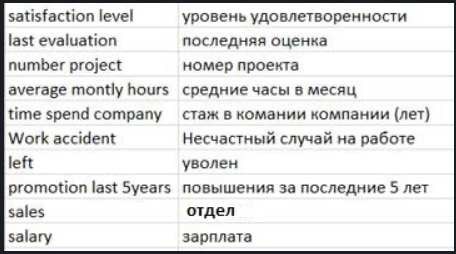

In [3]:
from PIL import Image
img = Image.open("image (1).png")
img

In [ ]:
df.info()

**2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)**

In [14]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
df.mode()

**3.Рассчитать и визуализировать корреляционную матрицу для переменных**

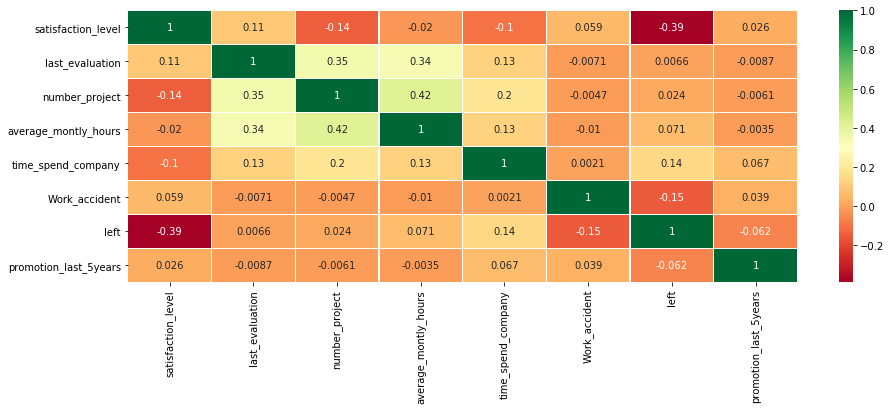

In [4]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #df.corr()-->матрица корреляций
fig=plt.gcf() #получение текущей фигуры
fig.set_size_inches(15,5) #установить размер фигуры
plt.show()

**4.Визуализировать несколько взаимосвязей между переменными**

In [ ]:
sns.pairplot(df)

**5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными**

In [5]:
def class_left(param):
    if param == 0:
        return "no"
    elif param == 1:
        return "yes"

In [6]:
df['class_left'] = df['left'].apply(class_left)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,class_left
0,0.38,0.53,2,157,3,0,1,0,sales,low,yes
1,0.80,0.86,5,262,6,0,1,0,sales,medium,yes
2,0.11,0.88,7,272,4,0,1,0,sales,medium,yes
3,0.72,0.87,5,223,5,0,1,0,sales,low,yes
4,0.37,0.52,2,159,3,0,1,0,sales,low,yes


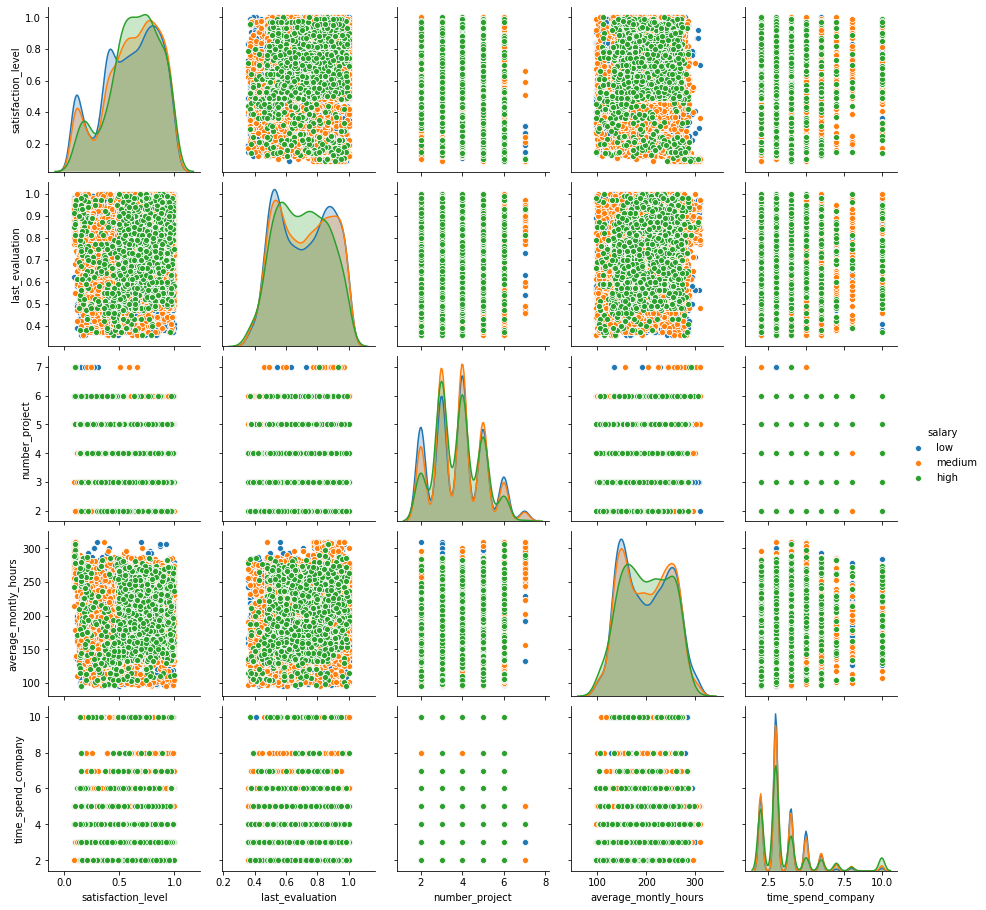

In [25]:
sns.pairplot(data=df,vars=['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company'], hue='salary')

In [ ]:
df['number_project'].unique()

In [27]:
print(len(df[df['salary'] == 'low']))
print(len(df[df['salary'] == 'medium']))
print(len(df[df['salary'] == 'high']))

7316
6446
1237


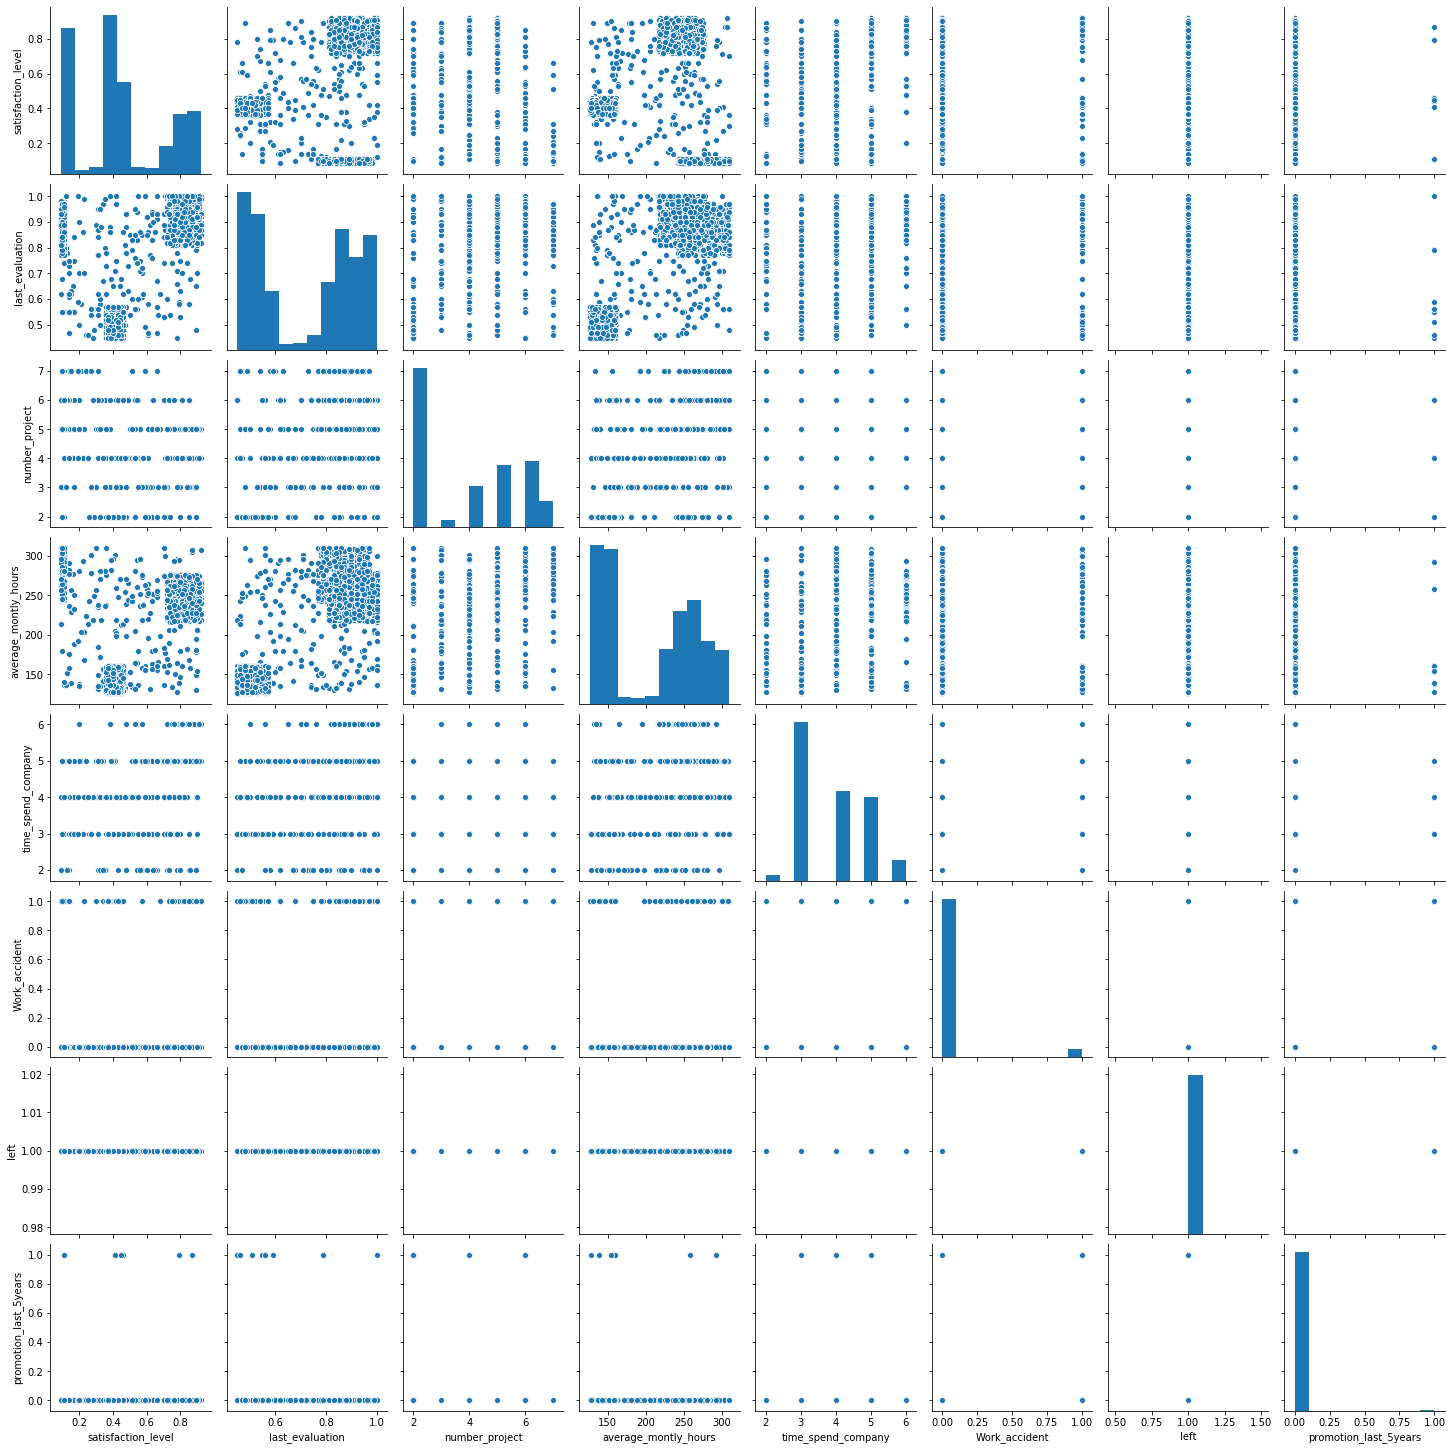

In [7]:
df_left = df[df['class_left'] == "yes"]
sns.pairplot(df_left)

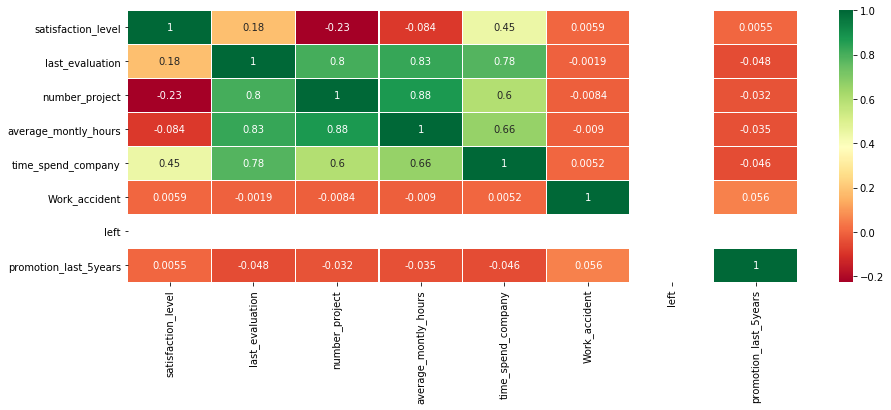

In [8]:
sns.heatmap(df_left.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #df.corr()-->матрица корреляций
fig=plt.gcf() #получение текущей фигуры
fig.set_size_inches(15,5) #установить размер фигуры
plt.show()

In [21]:
df_prom = df[df['promotion_last_5years'] == 0]
df_prom

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,class_left
0,0.38,0.53,2,157,3,0,1,0,sales,low,yes
1,0.80,0.86,5,262,6,0,1,0,sales,medium,yes
2,0.11,0.88,7,272,4,0,1,0,sales,medium,yes
3,0.72,0.87,5,223,5,0,1,0,sales,low,yes
4,0.37,0.52,2,159,3,0,1,0,sales,low,yes
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,yes
14995,0.37,0.48,2,160,3,0,1,0,support,low,yes
14996,0.37,0.53,2,143,3,0,1,0,support,low,yes
14997,0.11,0.96,6,280,4,0,1,0,support,low,yes


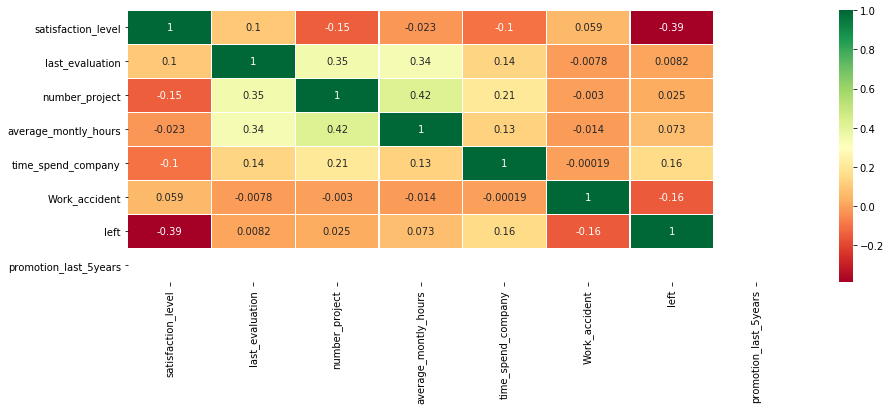

In [22]:
sns.heatmap(df_prom.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #df.corr()-->матрица корреляций
fig=plt.gcf() #получение текущей фигуры
fig.set_size_inches(15,5) #установить размер фигуры
plt.show()

In [ ]:
df_no_left = df[df['left'] == 0]
sns.pairplot(df_no_left)

**6.Рассчитать сколько работников работает в каждом департаменте**

In [ ]:
df['count_people'] = 1
df.head()

In [ ]:
df_department = df.groupby('sales').count()[['count_people']].reset_index()
df_department

**7.Показать распределение сотрудников по зарплатам**

In [ ]:
df_salary = df.groupby('salary').count()[['count_people']].reset_index()
df_salary

**8.Показать распределение сотрудников по зарплатам совместно с департаментами**

In [ ]:
df_dep_salary = df.groupby(['sales', 'salary']).count()[['count_people']].reset_index()
df_dep_salary

**9.Сколько сотрудников покинули компанию**

In [ ]:
print(f'уволилось сотрудников: {len(df[df["left"] == 1])}')

**10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию**